#Part 1

**Demonstrate that a neural network to maximize the log likelihood of label is one that has softmax output nodes and minimizes the criterion function of the negative log probability of training data set:**

A classification task is to categorize an observation to one of the target classes. 
Consider  x is a feature vector representing the observation and y is the class that the observation belongs to. The goal of the neural network is to find a function y=f(x) that can predict y from x. However in practical classification tasks there exits the misclassification risk due to missing information, noise interference or probabilistic process.
 the expected risk is defined as 
 $ R(f)=E_{X,Y~p(x,y)}L(f(x),y)$    
 
 where $L(f(x),y)$ is the loss function  that calculates the misclassification and p(x,y) is the probability  density function over space X and class Y.

 As p(x,y) is true but unknown data-generating probability distribution, we draw i.i.d samples from the data space and generate a training set.

$S={(x_{1},y_{1}),.....,(x_{m},y_{m})}$

which consist of m training samples. Then the risk can be approximated by the empirical risk 

$R_{s}(f)=\frac{1}{m}\sum_{i=1}^{m}L(f(x_{i}),y_{i})$


The loss function $L(f(x),y)$ can be flexibly defined to suit the model parameter optimization. In our example we use SGD (stochastic gradient descent). As we are considering a softmax  function as  the output layer non linear activation function . The loss function can be defined as 

  $L(f(x),y)=E_{p(y|x)}[-logp(y|x)]$
  
  $L(f(x),y)=-\sum_{c=1}^{C}p(y_{c}|x)log\hat{p}(y_{c}|x)$      ------(*)

  where C is the class and $p(y_{c}|x);c=1,....,C$ posterior probability of classes .

p(y_{c}|x) is the experical distribution of the training set and $\hat{p}(y_{c}|x)$ is predicted distribution.

In classification each training samples is commonly labeled as the correct class it belongs to 



 $  p(y_{c}|x) =\begin{cases}1       & \quad \text{if } x\in y_{c} \\
 0  & \quad \text{otherwise } \end{cases}$

 The equation * is simplified as $L(f(x),y)=-log\hat p(y_{c}|x)$   


 The above equation shows the loss function is negative log likelihood of sample x. therefore minimizing the emperical risk is equivalent to maximizing the likelihood. Maximimum likelihood is the a generative training training criterion where only the probability of the correct class is measured for each training set.


Ref:https://arxiv.org/pdf/1804.10690.pdf









**Demonstrate that a neural network to maximize the a posterior likelihood of observing the training data given a Gaussian prior is one that minimizes the criterion function with L2 regularization.**

For a linear model with multivariate normal prior and multivariate normal likelihood . we get a multivariate normal posterior distribution in whoch the mean of the posterior is similar to the L2 regularization.

given Gaussian prior as $p(w|\alpha)=N(w|0,\alpha^{-1}I)$ ---------(1)

Let us consider a continous target random variable t jas a gaussian distribution with mean $y(x,w)$ and variance $\beta^{-1}$
 that is 
 $p(t|x,w;\beta)=N(t|y(x,w),\beta^{-1})$  -------(2)
for an i.i.d data set of N observation $x_{1},.....,x_{N}$ with target values $D={t_{1},.....,t_{N} }$

$P(D|w,\beta)=\prod_{n=1}^{N} N(t_{n}|y(x_{n},w),\beta^{-1})$

the posterior probability is given as 

$p(w|D,\alpha,\beta)=p(D|w,\beta)p(w;a) /p(D;\alpha,\beta)$

$=N(w|0,\alpha^{-1}I)\prod_{n=1}^{N}N(t_{n}|y(x,w),\beta^{-1})/p(D;\alpha,\beta)$

by taking logorithm on both side we get 
=

=$\sum_{n} ||y(x_{n};w )-t_{n}||^{2}$

from the above equation we can conclude that gaussian distribution is similar to L2 regularization. 
by maximizing y(x,w) we can get maximum a posteriori estimate. 










In [ ]:
#part 2

In [ ]:
from keras.datasets import mnist
from sklearn.model_selection import train_test_split
import numpy as np
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import keras.backend as K
import keras
import tensorflow 
#from tensorflow import optimizers
 
from keras.layers import Flatten
from keras.layers import Dense
from keras import Sequential
from keras.optimizers import SGD

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train=x_train/255.0
x_test=x_test/255.0


data_set={}  #directory for each class
number_output_class=10

for i in range(number_output_class):
  data_set[i]=[]

#group the x_train with respect to y_train labels
for i in range(y_train.shape[0]):
  data_set[y_train[i]].append(x_train[i,:,:])

In [ ]:

x_test,x_val,y_test,y_val=train_test_split(x_test, y_test, test_size=0.2)


In [ ]:
x_val.shape

(2000, 28, 28)

In [ ]:

for i in range(10):

   print("dataset for label ",i,np.shape(data_set[i]))

dataset for label  0 (5923, 28, 28)
dataset for label  1 (6742, 28, 28)
dataset for label  2 (5958, 28, 28)
dataset for label  3 (6131, 28, 28)
dataset for label  4 (5842, 28, 28)
dataset for label  5 (5421, 28, 28)
dataset for label  6 (5918, 28, 28)
dataset for label  7 (6265, 28, 28)
dataset for label  8 (5851, 28, 28)
dataset for label  9 (5949, 28, 28)


In [ ]:

#get 100 images for each target
new_x_train=list()
new_y_train=list()
for i in range(len(data_set)):
  for k in range(100):
            new_x_train.append(data_set[i][k])
            new_y_train.append(i)

In [ ]:
new_x_train=np.asarray(new_x_train)
new_y_train=np.asarray(new_y_train)




In [ ]:
#one hot encoding  to change (1000,1) to (1000,10)

new_y_train = to_categorical(new_y_train)
y_val=to_categorical(y_val)
y_test = to_categorical(y_test)


In [ ]:
#to find the learning speed
learning_rate=[]
class SGDLearningRateTracker(keras.callbacks.Callback):
    
       
    def on_epoch_end(self, epoch, logs={}):
        optimizer = self.model.optimizer
        _lr = tf.cast(optimizer.lr, name='ToFloat',dtype='float32')
        _decay = tf.cast(optimizer.decay, name='ToFloat',dtype='float32')
        _iter = tf.cast(optimizer.iterations, name='ToFloat',dtype='float32')
        
        _lr = K.eval(_lr * (1. / (1. + _decay * _iter)))
        learning_rate.append(_lr)
        print(' - LR: {:.6f}\n'.format(_lr))
        

In [ ]:
## 1 hidden layer 
model=Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(30,activation='sigmoid'))
model.add(Dense(10,activation='softmax'))                 
sgd=SGD(lr=0.1,decay=0.001)
model.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])

In [ ]:

history=model.fit(new_x_train,new_y_train,validation_data=(x_val,y_val),epochs=30,batch_size=10,callbacks=[SGDLearningRateTracker()])


Train on 1000 samples, validate on 2000 samples
Epoch 1/30
1000/1000 [==============================] - 0s 367us/step - loss: 1.9781 - accuracy: 0.4420 - val_loss: 1.6292 - val_accuracy: 0.6310
 - LR: 0.090909

Epoch 2/30
1000/1000 [==============================] - 0s 297us/step - loss: 1.3501 - accuracy: 0.7460 - val_loss: 1.1786 - val_accuracy: 0.7780
 - LR: 0.083333

Epoch 3/30
1000/1000 [==============================] - 0s 290us/step - loss: 0.9961 - accuracy: 0.8160 - val_loss: 0.9433 - val_accuracy: 0.7825
 - LR: 0.076923

Epoch 4/30
1000/1000 [==============================] - 0s 288us/step - loss: 0.8014 - accuracy: 0.8350 - val_loss: 0.8110 - val_accuracy: 0.8190
 - LR: 0.071429

Epoch 5/30
1000/1000 [==============================] - 0s 281us/step - loss: 0.6811 - accuracy: 0.8670 - val_loss: 0.7272 - val_accuracy: 0.8315
 - LR: 0.066667

Epoch 6/30
1000/1000 [==============================] - 0s 293us/step - loss: 0.5981 - accuracy: 0.8720 - val_loss: 0.6782 - val_accuracy

In [ ]:
score=model.evaluate(x_test,y_test)

8000/8000 [==============================] - 0s 24us/step


In [ ]:
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

#https://machinelearningmastery.com/evaluate-performance-deep-learning-models-keras/

accuracy: 87.09%


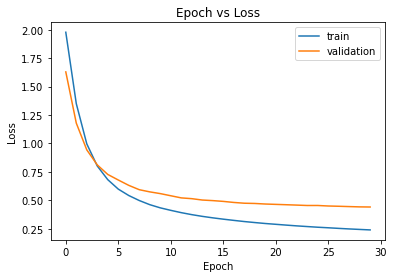

In [ ]:
#plot the train and test error

plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='validation')
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Epoch vs Loss')
plt.show()



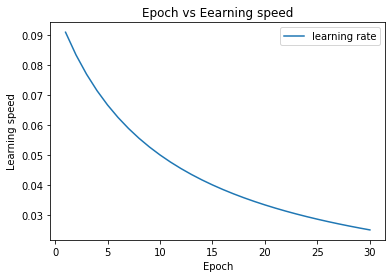

In [ ]:

# Learning speed for 1 hidden layer
epoch=[]
for i in range(1,31):
    epoch.append(i)
    
plt.plot(epoch, learning_rate,label='learning rate')
plt.xlabel('Epoch')
plt.ylabel('Learning speed')
plt.legend(loc='upper right')
plt.title('Epoch vs Eearning speed')

plt.show()
learning_rate=[]

In [ ]:
## with 2 hidden layers


model1=Sequential()
model1.add(Flatten(input_shape=(28,28)))
model1.add(Dense(30,activation='sigmoid'))
model1.add(Dense(30,activation='sigmoid'))
model1.add(Dense(10,activation='softmax'))
                  
sgd=SGD(lr=0.1,decay=0.001)
model1.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])

In [ ]:
#dataset()
history=model1.fit(new_x_train,new_y_train,validation_data=(x_val,y_val),epochs=30,batch_size=10,callbacks=[SGDLearningRateTracker()])

Train on 1000 samples, validate on 2000 samples
Epoch 1/30
1000/1000 [==============================] - 0s 372us/step - loss: 2.3188 - accuracy: 0.1200 - val_loss: 2.2697 - val_accuracy: 0.1855
 - LR: 0.090909

Epoch 2/30
1000/1000 [==============================] - 0s 280us/step - loss: 2.2401 - accuracy: 0.1920 - val_loss: 2.1983 - val_accuracy: 0.2525
 - LR: 0.083333

Epoch 3/30
1000/1000 [==============================] - 0s 292us/step - loss: 2.1457 - accuracy: 0.3360 - val_loss: 2.0919 - val_accuracy: 0.3335
 - LR: 0.076923

Epoch 4/30
1000/1000 [==============================] - 0s 282us/step - loss: 2.0150 - accuracy: 0.4310 - val_loss: 1.9389 - val_accuracy: 0.5575
 - LR: 0.071429

Epoch 5/30
1000/1000 [==============================] - 0s 284us/step - loss: 1.8450 - accuracy: 0.5370 - val_loss: 1.7645 - val_accuracy: 0.6025
 - LR: 0.066667

Epoch 6/30
1000/1000 [==============================] - 0s 285us/step - loss: 1.6597 - accuracy: 0.6150 - val_loss: 1.5965 - val_accuracy

In [ ]:
score=model1.evaluate(x_test,y_test)
print("%s: %.2f%%" % (model1.metrics_names[1], score[1]*100))

8000/8000 [==============================] - 0s 23us/step
accuracy: 83.07%


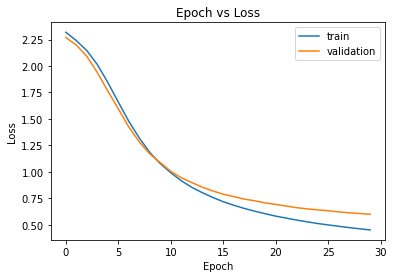

In [ ]:
#plot for 2 hidden layer

plt.plot(history.history['loss'],label="train")
plt.plot(history.history['val_loss'],label='validation')
plt.title('Epoch vs Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()



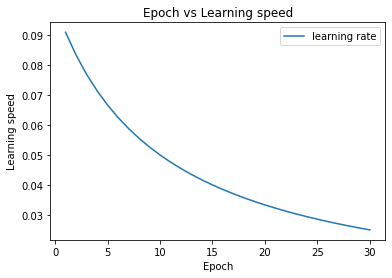

In [ ]:
#Learning rate for 2 hidden layer
epoch=[]
for i in range(1,31):
    epoch.append(i)
    
plt.plot(epoch, learning_rate,label='learning rate')
plt.title('Epoch vs Learning speed')
plt.xlabel('Epoch')
plt.ylabel('Learning speed')
plt.legend(loc='upper right')
plt.show()
learning_rate=[]

In [ ]:
## with 3 hidden layers



model=Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(30,activation='sigmoid'))
model.add(Dense(30,activation='sigmoid'))
model.add(Dense(30,activation='sigmoid'))
model.add(Dense(10,activation='softmax'))
                  
sgd=SGD(lr=0.1,decay=0.001)
model.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])

In [ ]:

history=model.fit(new_x_train,new_y_train,validation_data=(x_val,y_val),epochs=30,batch_size=10,callbacks=[SGDLearningRateTracker()])


Train on 1000 samples, validate on 2000 samples
Epoch 1/30
1000/1000 [==============================] - 0s 393us/step - loss: 2.3341 - accuracy: 0.0900 - val_loss: 2.3206 - val_accuracy: 0.0925
 - LR: 0.090909

Epoch 2/30
1000/1000 [==============================] - 0s 310us/step - loss: 2.3211 - accuracy: 0.0850 - val_loss: 2.3102 - val_accuracy: 0.1905
 - LR: 0.083333

Epoch 3/30
1000/1000 [==============================] - 0s 295us/step - loss: 2.3196 - accuracy: 0.0850 - val_loss: 2.2975 - val_accuracy: 0.1090
 - LR: 0.076923

Epoch 4/30
1000/1000 [==============================] - 0s 313us/step - loss: 2.3118 - accuracy: 0.1000 - val_loss: 2.3000 - val_accuracy: 0.1110
 - LR: 0.071429

Epoch 5/30
1000/1000 [==============================] - 0s 296us/step - loss: 2.3072 - accuracy: 0.0920 - val_loss: 2.2946 - val_accuracy: 0.2725
 - LR: 0.066667

Epoch 6/30
1000/1000 [==============================] - 0s 293us/step - loss: 2.3025 - accuracy: 0.1210 - val_loss: 2.3033 - val_accuracy

8000/8000 [==============================] - 0s 25us/step
accuracy: 50.51%


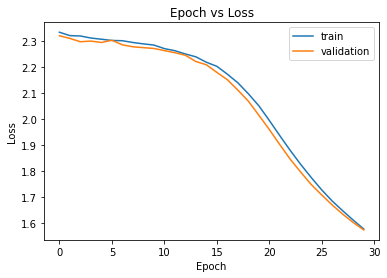

In [ ]:
score=model.evaluate(x_test,y_test)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

plt.plot(history.history['loss'],label="train")
plt.plot(history.history['val_loss'],label="validation")
plt.title('Epoch vs Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.show()#

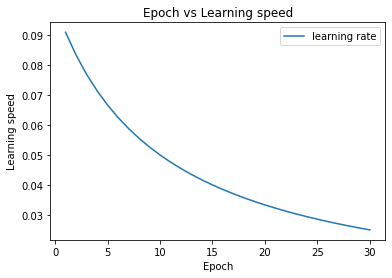

In [ ]:
#Learning rate for 3 hidden layer
epoch=[]
for i in range(1,31):
    epoch.append(i)
    
plt.plot(epoch, learning_rate,label='learning rate')
plt.title('Epoch vs Learning speed')
plt.xlabel('Epoch')
plt.ylabel('Learning speed')
plt.legend(loc='upper right')
plt.show()
learning_rate=[]

 With L2 Reguralization 

In [ ]:
# 1 hidden layer

model=Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(30,activation='sigmoid',kernel_regularizer=keras.regularizers.l2(l=5)))
model.add(Dense(10,activation='softmax'))
                  
sgd=SGD(lr=0.1,decay=0.001)


model.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])



In [ ]:

history=model.fit(new_x_train,new_y_train,validation_data=(x_val,y_val),epochs=30,batch_size=10,callbacks=[SGDLearningRateTracker()])


Train on 1000 samples, validate on 2000 samples
Epoch 1/30
1000/1000 [==============================] - 0s 375us/step - loss: 5.2878 - accuracy: 0.1130 - val_loss: 2.3517 - val_accuracy: 0.1130
 - LR: 0.090909

Epoch 2/30
1000/1000 [==============================] - 0s 299us/step - loss: 2.3391 - accuracy: 0.1200 - val_loss: 2.3704 - val_accuracy: 0.1185
 - LR: 0.083333

Epoch 3/30
1000/1000 [==============================] - 0s 285us/step - loss: 2.3391 - accuracy: 0.1170 - val_loss: 2.3333 - val_accuracy: 0.1075
 - LR: 0.076923

Epoch 4/30
1000/1000 [==============================] - 0s 288us/step - loss: 2.3391 - accuracy: 0.1100 - val_loss: 2.3247 - val_accuracy: 0.1370
 - LR: 0.071429

Epoch 5/30
1000/1000 [==============================] - 0s 296us/step - loss: 2.3344 - accuracy: 0.1170 - val_loss: 2.3195 - val_accuracy: 0.1310
 - LR: 0.066667

Epoch 6/30
1000/1000 [==============================] - 0s 289us/step - loss: 2.3305 - accuracy: 0.1160 - val_loss: 2.3171 - val_accuracy

8000/8000 [==============================] - 0s 25us/step
accuracy: 18.74%


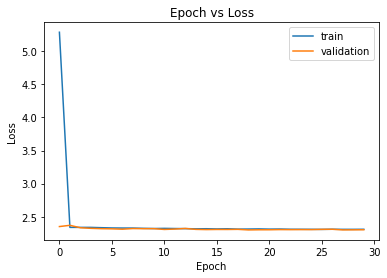

In [ ]:
score=model.evaluate(x_test,y_test)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

plt.plot(history.history['loss'],label="train")
plt.plot(history.history['val_loss'],label="validation")
plt.title('Epoch vs Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.show()#

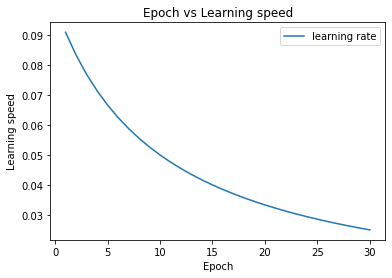

In [ ]:
#Learning rate for 1 hidden layer
epoch=[]
for i in range(1,31):
    epoch.append(i)
    
plt.plot(epoch, learning_rate,label='learning rate')
plt.xlabel('Epoch')
plt.ylabel('Learning speed')
plt.title('Epoch vs Learning speed')
plt.legend(loc='upper right')
plt.show()
learning_rate=[]

In [ ]:
## with 2 hidden layers

model=Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(30,activation='sigmoid',kernel_regularizer=keras.regularizers.l2(l=5)))
model.add(Dense(30,activation='sigmoid',kernel_regularizer=keras.regularizers.l2(l=5)))
model.add(Dense(10,activation='softmax'))
                  
sgd=SGD(lr=0.1,decay=0.001)
model.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])

In [ ]:
history=model.fit(new_x_train,new_y_train,validation_data=(x_val,y_val),epochs=30,batch_size=10,callbacks=[SGDLearningRateTracker()])


Train on 1000 samples, validate on 2000 samples
Epoch 1/30
1000/1000 [==============================] - 0s 395us/step - loss: 6.7396 - accuracy: 0.0970 - val_loss: 2.3197 - val_accuracy: 0.1090
 - LR: 0.090909

Epoch 2/30
1000/1000 [==============================] - 0s 319us/step - loss: 2.3282 - accuracy: 0.1030 - val_loss: 2.3087 - val_accuracy: 0.0960
 - LR: 0.083333

Epoch 3/30
1000/1000 [==============================] - 0s 300us/step - loss: 2.3278 - accuracy: 0.0740 - val_loss: 2.3099 - val_accuracy: 0.0965
 - LR: 0.076923

Epoch 4/30
1000/1000 [==============================] - 0s 300us/step - loss: 2.3249 - accuracy: 0.0920 - val_loss: 2.3120 - val_accuracy: 0.1020
 - LR: 0.071429

Epoch 5/30
1000/1000 [==============================] - 0s 309us/step - loss: 2.3193 - accuracy: 0.1010 - val_loss: 2.3141 - val_accuracy: 0.1020
 - LR: 0.066667

Epoch 6/30
1000/1000 [==============================] - 0s 300us/step - loss: 2.3226 - accuracy: 0.0960 - val_loss: 2.3076 - val_accuracy

8000/8000 [==============================] - 0s 23us/step
accuracy: 8.91%


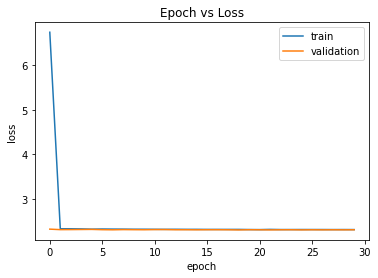

In [ ]:
score=model.evaluate(x_test,y_test)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

plt.plot(history.history['loss'],label="train")
plt.plot(history.history['val_loss'],label="validation")
plt.title('Epoch vs Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(loc='upper right')

plt.show()#

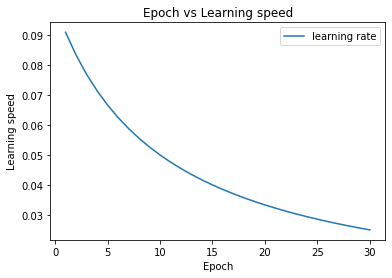

In [ ]:
#Learning rate for 2 hidden layer
epoch=[]
for i in range(1,31):
    epoch.append(i)
    
plt.plot(epoch, learning_rate,label='learning rate')
plt.xlabel('Epoch')
plt.ylabel('Learning speed')
plt.legend(loc='upper right')
plt.title('Epoch vs Learning speed')
plt.show()
learning_rate=[]

In [ ]:
## with 3 hidden layers

model=Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(30,activation='sigmoid',kernel_regularizer=keras.regularizers.l2(l=5)))
model.add(Dense(30,activation='sigmoid',kernel_regularizer=keras.regularizers.l2(l=5)))
model.add(Dense(30,activation='sigmoid',kernel_regularizer=keras.regularizers.l2(l=5)))
model.add(Dense(10,activation='softmax'))
                  
sgd=SGD(lr=0.1,decay=0.001)
model.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])

In [ ]:
history=model.fit(new_x_train,new_y_train,validation_data=(x_val,y_val),epochs=30,batch_size=10,callbacks=[SGDLearningRateTracker()])


Train on 1000 samples, validate on 2000 samples
Epoch 1/30
1000/1000 [==============================] - 0s 404us/step - loss: 8.2055 - accuracy: 0.1070 - val_loss: 2.3258 - val_accuracy: 0.1075
 - LR: 0.090909

Epoch 2/30
1000/1000 [==============================] - 0s 306us/step - loss: 2.3299 - accuracy: 0.0880 - val_loss: 2.3151 - val_accuracy: 0.1020
 - LR: 0.083333

Epoch 3/30
1000/1000 [==============================] - 0s 304us/step - loss: 2.3221 - accuracy: 0.1030 - val_loss: 2.3153 - val_accuracy: 0.0965
 - LR: 0.076923

Epoch 4/30
1000/1000 [==============================] - 0s 294us/step - loss: 2.3245 - accuracy: 0.0910 - val_loss: 2.3190 - val_accuracy: 0.1075
 - LR: 0.071429

Epoch 5/30
1000/1000 [==============================] - 0s 301us/step - loss: 2.3194 - accuracy: 0.0940 - val_loss: 2.3172 - val_accuracy: 0.0925
 - LR: 0.066667

Epoch 6/30
1000/1000 [==============================] - 0s 301us/step - loss: 2.3238 - accuracy: 0.0810 - val_loss: 2.3062 - val_accuracy

8000/8000 [==============================] - 0s 25us/step
accuracy: 11.59%


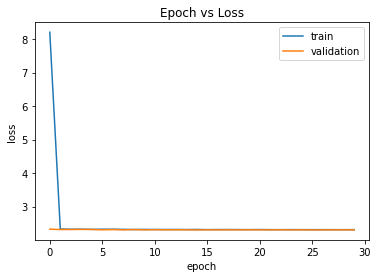

In [ ]:
score=model.evaluate(x_test,y_test)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],label="train")
plt.plot(history.history['val_loss'],label="validation")
plt.title('Epoch vs Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(loc='upper right')

plt.show()

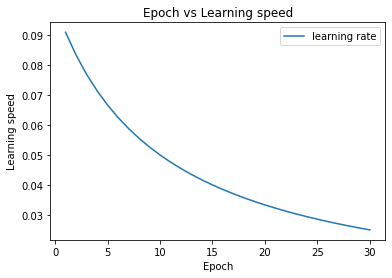

In [ ]:
#Learning rate for 3 layers
epoch=[]
for i in range(1,31):
    epoch.append(i)
    
plt.plot(epoch, learning_rate,label='learning rate')
plt.xlabel('Epoch')
plt.ylabel('Learning speed')
plt.legend(loc='upper right')
plt.title('Epoch vs Learning speed')
plt.show()
learning_rate=[]

#Reference:
https://github.com/keras-team/keras/blob/master/keras/optimizers.py#L164

https://stats.stackexchange.com/questions/163388/why-is-the-l2-regularization-equivalent-to-gaussian-prior

https://arxiv.org/pdf/1804.10690.pdf